In [1]:
# Lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data
db1 = pd.read_csv('applications.csv')
db2 = pd.read_csv('industries.csv')

In [3]:
# Clean 'applications.csv'

In [4]:
db1 = db1.drop_duplicates(subset='applicant_id', keep='first')
db1['External Rating'] = db1['External Rating'].fillna(0)
db1['Education level'] = db1['Education level'].fillna('Average')
db1['Location'] = db1['Location'].fillna('')
db1['Amount'] = db1['Amount'].fillna(0)
db1

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,0.0,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3
...,...,...,...,...,...,...,...,...,...,...
13310,01.09.2023 11:01,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",01908b949a6a1eb44d1ee013ec377f9d
13311,01.09.2023 11:14,10500.0,28,Male,Blockchain,Married,5.0,"Higher Degree (bachelor's, specialist's, maste...",,6599ba629cfcfe8ac42c7d31c13f62de
13312,01.09.2023 11:19,5790.0,25,Male,Blockchain,Married,3.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",e57f181bec5b11870a541c43d9b960f7
13313,01.09.2023 11:28,13500.0,31,Male,Mobile,Single,8.0,General secondary education,"Luxembourg, Luxembourg City",a340c62a1226509949ef60df10a7d726


In [5]:
# Merge dataframes and convert date column to correct format

In [6]:
db = db1.merge(db2[['Industry', 'Score']], on='Industry')
db['Applied at'] = pd.to_datetime(db['Applied at'], format='mixed', errors='coerce') - pd.to_timedelta(7, unit='d')
db

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,2022-11-23 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,2022-11-23 10:26:39,0.0,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",,63dfcf8e6904186650d6814279fbe42f,20
2,2022-11-23 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498,10
3,2022-11-23 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1,15
4,2022-11-23 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15
...,...,...,...,...,...,...,...,...,...,...,...
13273,2023-01-02 11:01:00,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",01908b949a6a1eb44d1ee013ec377f9d,15
13274,2023-01-02 11:14:00,10500.0,28,Male,Blockchain,Married,5.0,"Higher Degree (bachelor's, specialist's, maste...",,6599ba629cfcfe8ac42c7d31c13f62de,0
13275,2023-01-02 11:19:00,5790.0,25,Male,Blockchain,Married,3.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",e57f181bec5b11870a541c43d9b960f7,0
13276,2023-01-02 11:28:00,13500.0,31,Male,Mobile,Single,8.0,General secondary education,"Luxembourg, Luxembourg City",a340c62a1226509949ef60df10a7d726,15


In [7]:
# Create evaluation column

In [8]:
db['Evaluation Score'] = 0
db

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation Score
0,2022-11-23 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,0
1,2022-11-23 10:26:39,0.0,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",,63dfcf8e6904186650d6814279fbe42f,20,0
2,2022-11-23 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498,10,0
3,2022-11-23 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1,15,0
4,2022-11-23 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13273,2023-01-02 11:01:00,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",01908b949a6a1eb44d1ee013ec377f9d,15,0
13274,2023-01-02 11:14:00,10500.0,28,Male,Blockchain,Married,5.0,"Higher Degree (bachelor's, specialist's, maste...",,6599ba629cfcfe8ac42c7d31c13f62de,0,0
13275,2023-01-02 11:19:00,5790.0,25,Male,Blockchain,Married,3.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",e57f181bec5b11870a541c43d9b960f7,0,0
13276,2023-01-02 11:28:00,13500.0,31,Male,Mobile,Single,8.0,General secondary education,"Luxembourg, Luxembourg City",a340c62a1226509949ef60df10a7d726,15,0


In [9]:
# 1. Apply score filters:

In [10]:
def calculate_score(row):
    score = 0
    if 35 <= row['Age'] <= 55:
        score += 20
    if row['Applied at'].weekday() >= 5:
        score += 20
    if row['Marital status'] == 'Married':
        score += 20
    if 'kiyv' in row['Location'].lower() or 'ukraine' in row['Location'].lower():
        score += 20
    if row['External Rating'] >= 7.0:
        score += 20
    if row['External Rating'] <= 2.0:
        score -= 20
    score += row['Score']
    if row['Amount'] == 0:
        score = 0
    if row['External Rating'] == 0:
        score = 0
    return score

In [11]:
# Evaluation scores after applying filters:

In [12]:
db['Evaluation Score'] = db.apply(calculate_score, axis = 1)
db

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation Score
0,2022-11-23 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
1,2022-11-23 10:26:39,0.0,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",,63dfcf8e6904186650d6814279fbe42f,20,0
2,2022-11-23 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498,10,10
3,2022-11-23 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1,15,0
4,2022-11-23 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...
13273,2023-01-02 11:01:00,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",01908b949a6a1eb44d1ee013ec377f9d,15,15
13274,2023-01-02 11:14:00,10500.0,28,Male,Blockchain,Married,5.0,"Higher Degree (bachelor's, specialist's, maste...",,6599ba629cfcfe8ac42c7d31c13f62de,0,20
13275,2023-01-02 11:19:00,5790.0,25,Male,Blockchain,Married,3.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",e57f181bec5b11870a541c43d9b960f7,0,20
13276,2023-01-02 11:28:00,13500.0,31,Male,Mobile,Single,8.0,General secondary education,"Luxembourg, Luxembourg City",a340c62a1226509949ef60df10a7d726,15,35


In [13]:
# Final dataframe, containing all eligible candidates

In [14]:
db = db[db['Evaluation Score'] != 0]
db = db.reset_index(drop=True)
db

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation Score
0,2022-11-23 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
1,2022-11-23 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498,10,10
2,2022-11-23 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3,15,15
3,2022-11-23 10:27:38,16500.0,31,Male,E-commerce,Single,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",f720bf9c5c4c3e10a8568c1699847696,15,35
4,2022-11-23 10:27:42,4200.0,30,Male,Media,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","Lithuania, Vilnius",0aaf59fb3ef90f50ccd4800312e5c271,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12366,2023-01-02 11:01:00,12000.0,25,Male,Medtech / Healthcare,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",01908b949a6a1eb44d1ee013ec377f9d,15,15
12367,2023-01-02 11:14:00,10500.0,28,Male,Blockchain,Married,5.0,"Higher Degree (bachelor's, specialist's, maste...",,6599ba629cfcfe8ac42c7d31c13f62de,0,20
12368,2023-01-02 11:19:00,5790.0,25,Male,Blockchain,Married,3.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",e57f181bec5b11870a541c43d9b960f7,0,20
12369,2023-01-02 11:28:00,13500.0,31,Male,Mobile,Single,8.0,General secondary education,"Luxembourg, Luxembourg City",a340c62a1226509949ef60df10a7d726,15,35


In [15]:
# Average candidates scores grouped by weeks

In [16]:
fdb = db.groupby([pd.Grouper(key='Applied at', freq='W')])['Evaluation Score'].mean().reset_index().sort_values(by='Applied at')
fdb

,Applied at,Evaluation Score
0,2022-11-27,35.679575
1,2022-12-04,29.377535
2,2022-12-11,29.331423
3,2022-12-18,34.553407
4,2022-12-25,30.164993
5,2023-01-01,31.777251
6,2023-01-08,30.625000


In [17]:
# Graph with Evaluation score average divided by week of application

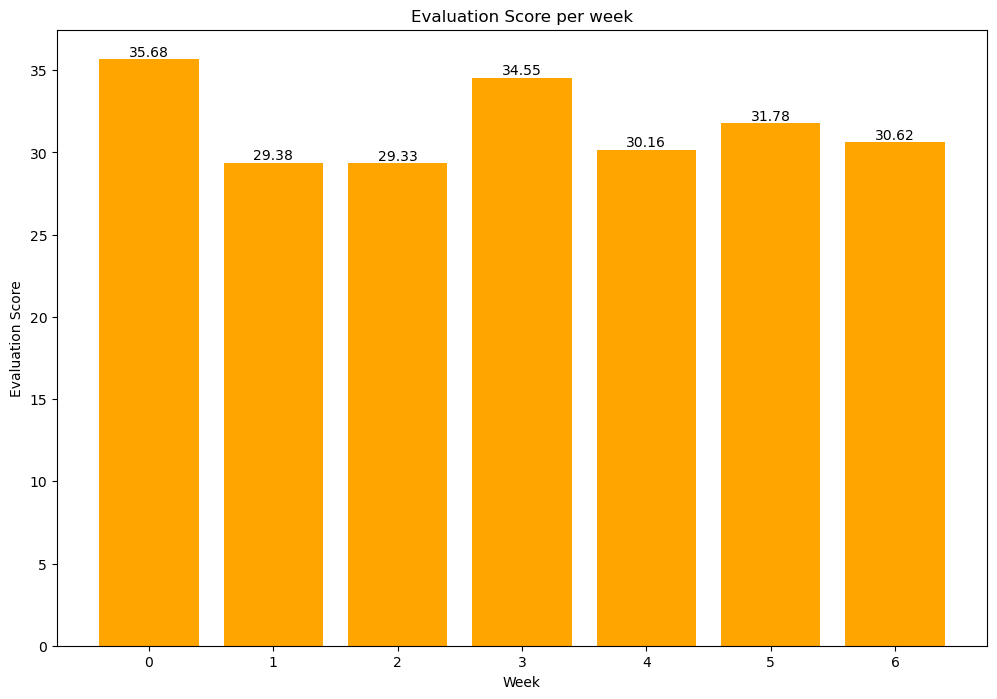

In [18]:
dims = (12, 8)
plt.figure(figsize=dims)
bars = plt.bar(fdb.index, fdb['Evaluation Score'], color='orange')
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.title('Evaluation Score per week')
plt.xlabel('Week')
plt.ylabel('Evaluation Score')
plt.show()